In [14]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import scipy
from IPython.display import display, Latex

In [15]:

t, x = sp.symbols("t, x")

a = 1
b = 3

n = 2

T = 5

C = 5

c = 1

L = lambda y: sp.diff(y, t) - c * sp.diff(y, x)

L_0 = [lambda y: y, lambda y: sp.diff(y, x)]

L_G = [lambda y: y]

H = sp.Piecewise((0, t <= 0), (1, t > 0))

G = H.subs({t: t - abs(x) / c}) / 2 / c

y_expr = x*x + (t - 1) ** 2


zero = np.random.uniform(0.0001, 9.0002)

In [16]:
def cartesian_product(x, y):
    return np.dstack(np.meshgrid(x, y)).reshape(-1, 2)

In [17]:
eps = np.random. uniform(0.0001,0.0002)

S = np.linspace(a, b, n)
time = np.linspace(0, T, n)
S_T = cartesian_product(S, time)

pre_time = np.linspace(-C, -eps, n)
S_0 = cartesian_product(S, pre_time)

pre_space = np.linspace(a - c, a - eps, n)

post_space = np.linspace(b + eps, b + c, n)

out_space = np.concatenate((pre_space, post_space), axis=0)
S_G = cartesian_product(out_space, time)

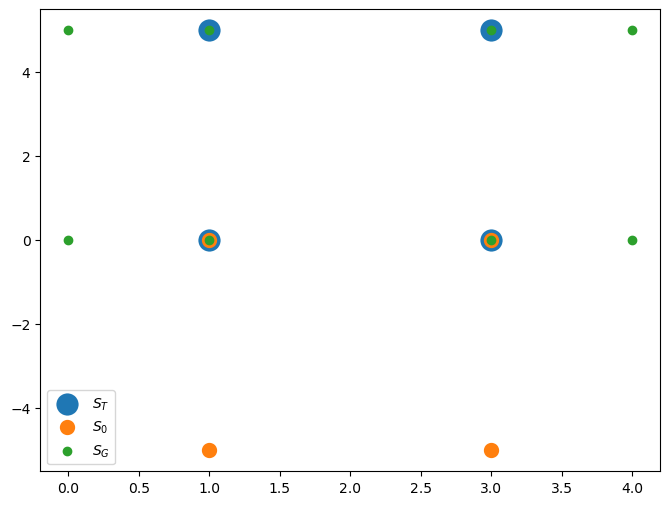

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(S_T[:, 0], S_T[:, 1], label="$S_T$", linewidths=10)
plt.scatter(S_0[:, 0], S_0[:, 1], label="$S_0$", linewidths=5)
plt.scatter(S_G[:, 0], S_G[:, 1], label="$S_G$")
plt.legend()
plt.show()

$\begin{aligned} & B_{11}(x)=\operatorname{col}\left(\operatorname{str}\left(\left.L_r^0\left(\partial_t\right) G\left(s-s_m^0\right)\right|_{t=0}, m=\overline{1, M_0}\right), r=\overline{1, R_0}\right), \\ & B_{12}(x)=\operatorname{col}\left(\operatorname{str}\left(\left.L_r^0\left(\partial_t\right) G\left(s-s_m^{\Gamma}\right)\right|_{t=0}, m=\overline{1, M_{\Gamma}}\right), r=\overline{1, R_0}\right), \\ & B_{21}(x, t)=\operatorname{col}\left(\operatorname{str}\left(L_\rho^{\Gamma}\left(\partial_x\right) G\left(s-s_m^0\right), m=\overline{1, M_0}\right), \rho=\overline{1, R_{\Gamma}}\right), \\ & B_{22}(x, t)=\operatorname{col}\left(\operatorname{str}\left(L_\rho^{\Gamma}\left(\partial_x\right) G\left(s-s_m^{\Gamma}\right), m=\overline{1, M_{\Gamma}}\right), \rho=\overline{1, R_{\Gamma}}\right) .\end{aligned}$

In [19]:
r_0, m_0 = len(L_0), len(S_0)
B_11 = np.zeros((r_0, m_0)).tolist()

for i in range(r_0):
    for j in range(m_0):
        s_x, s_t = S_0[j]
        expr = L_0[i](G.subs([(x, x - s_x), (t, t - s_t)])).subs(t, zero)
        B_11[i][j] = expr

B_11 = sp.Matrix(B_11)
B_11

Matrix([
[Piecewise((0, Abs(x - 1.0) - 6.07662149969782 >= 0), (1, True))/2, Piecewise((0, Abs(x - 3.0) - 6.07662149969782 >= 0), (1, True))/2, Piecewise((0, Abs(x - 1.0) - 1.07675111678242 >= 0), (1, True))/2, Piecewise((0, Abs(x - 3.0) - 1.07675111678242 >= 0), (1, True))/2],
[                                                                0,                                                                 0,                                                                 0,                                                                 0]])

In [20]:
r_0, m_0 = len(L_0), len(S_G)
B_12 = np.zeros((r_0, m_0)).tolist()

for i in range(r_0):
    for j in range(m_0):
        s_x, s_t = S_G[j]
        expr = L_0[i](G.subs([(x, x - s_x), (t, t - s_t)])).subs(t, zero)
        B_12[i][j] = expr

B_12 = sp.Matrix(B_12)
B_12

Matrix([
[Piecewise((0, Abs(x) - 1.07662149969782 >= 0), (1, True))/2, Piecewise((0, Abs(x - 0.999870382915404) - 1.07662149969782 >= 0), (1, True))/2, Piecewise((0, Abs(x - 3.0001296170846) - 1.07662149969782 >= 0), (1, True))/2, Piecewise((0, Abs(x - 4.0) - 1.07662149969782 >= 0), (1, True))/2, 0, 0, 0, 0],
[                                                          0,                                                                               0,                                                                             0,                                                                 0, 0, 0, 0, 0]])

In [21]:
r_G, m_0 = len(L_G), len(S_0)
B_21 = np.zeros((r_G, m_0)).tolist()
for i in range(r_G):
    for j in range(m_0):
        s_x, s_t = S_0[j]
        expr = L_G[i](G.subs([(x, x - s_x), (t, t - s_t)]))
        B_21[i][j] = expr

B_21 = sp.Matrix(B_21)
B_21

Matrix([[Piecewise((0, t - Abs(x - 1.0) + 5.0 <= 0), (1, True))/2, Piecewise((0, t - Abs(x - 3.0) + 5.0 <= 0), (1, True))/2, Piecewise((0, t - Abs(x - 1.0) + 0.000129617084596289 <= 0), (1, True))/2, Piecewise((0, t - Abs(x - 3.0) + 0.000129617084596289 <= 0), (1, True))/2]])

In [22]:
r_G, m_G = len(L_G), len(S_G)
B_22 = np.zeros((r_G, m_G)).tolist()
for i in range(r_G):
    for j in range(m_G):
        sx, st = S_G[j]
        expr = L_G[i](G.subs([(x, x - s_x), (t, t - s_t)]))
        B_22[i][j] = expr
B_22 = sp.Matrix(B_22)
B_22

Matrix([[Piecewise((0, t - Abs(x - 3.0) + 0.000129617084596289 <= 0), (1, True))/2, Piecewise((0, t - Abs(x - 3.0) + 0.000129617084596289 <= 0), (1, True))/2, Piecewise((0, t - Abs(x - 3.0) + 0.000129617084596289 <= 0), (1, True))/2, Piecewise((0, t - Abs(x - 3.0) + 0.000129617084596289 <= 0), (1, True))/2, Piecewise((0, t - Abs(x - 3.0) + 0.000129617084596289 <= 0), (1, True))/2, Piecewise((0, t - Abs(x - 3.0) + 0.000129617084596289 <= 0), (1, True))/2, Piecewise((0, t - Abs(x - 3.0) + 0.000129617084596289 <= 0), (1, True))/2, Piecewise((0, t - Abs(x - 3.0) + 0.000129617084596289 <= 0), (1, True))/2]])

In [23]:
def int_S(M):
    n, m = sp.shape(M)
    X = np.zeros((n, m))
    for i in range(n):
        for j in range(m):
            X[i][j] = scipy.integrate.quad(lambda x1: M[i, j].subs({x:x1}).evalf(), a, b)[0]
    return X

In [24]:
def int_G(M):
    n, m = sp.shape(M)
    X = np.zeros((n, m))
    for i in range(n):
        for j in range(m):
            f = lambda x_val, t_val: M[i, j].subs({x: x_val, t: t_val}).evalf()
            val1 = scipy.integrate.quad(lambda t: f(a, t), zero, T)[0]
            val2 = scipy.integrate.quad(lambda t: f(b, t), zero, T)[0]
            X[i][j] = val1 + val2
    return X

$\begin{gathered}P_{i j}=\int_{S_0} B_{1 i}^T(x) B_{1 j}(x) d x+\int_{\Gamma \times[0, T]} B_{2 i}^T(x, t) B_{2 j}(x, t) d x d t \\ B_{y i}=\int_{S_0} B_{1 i}^T(x) Y_0(x) d x+\int_{\Gamma \times[0, T]} B_{2 i}^T(x, t) Y_{\Gamma}(x, t) d x d t \quad(i, j=\overline{1,2}) .\end{gathered}$

In [26]:
P = np.zeros((2, 2)).tolist()

In [27]:
part_1 = B_11.T * B_11; part_1.simplify()
part_2 = B_21.T * B_21; part_2.simplify()

In [28]:
P[0][0] = int_S(part_1) + int_G(part_2)

In [29]:
part_1 = B_11.T * B_12; part_1.simplify()
part_2 = B_21.T * B_22; part_2.simplify()

In [30]:
P[0][1] = int_S(part_1) + int_G(part_2)

In [31]:
part_1 = B_12.T * B_11; part_1.simplify()
part_2 = B_22.T * B_21; part_2.simplify()

In [32]:
P[1][0] = int_S(part_1) + int_G(part_2)

In [33]:
part_1 = B_12.T * B_12; part_1.simplify()
part_2 = B_22.T * B_22; part_2.simplify()

In [34]:
P[1][1] = int_S(part_1) + int_G(part_2)

C:\Users\nickk\AppData\Local\Temp\ipykernel_24792\3961215191.py:6: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  X[i][j] = scipy.integrate.quad(lambda x1: M[i, j].subs({x:x1}).evalf(), a, b)[0]


In [36]:
#B = [[B_11, B_12], [B_21, B_22]]
#P = np.zeros((2, 2)).tolist()
#for i in range(2):
#    for j in range(2):
#        p_1 = B[0][i].T * B[0][j]; p_1.simplify()
#        p_2 = B[1][i].T * B[1][j]; p_2.simplify()
#        P[i][j] = int_S(p_1) + int_G(p_2)

In [41]:
u = sp.lambdify([x, t], L(y_expr))
y_inf = sum([G.subs({x: x - s_x, t: t - s_t}) * u(s_x, s_t) for (s_x, s_t) in S_T])
_Y_r_0 = [diff_op(y_expr).subs(t, zero) - diff_op(y_inf).subs(t, zero) for diff_op in L_0]
_Y_G = [diff_op(y_expr).subs(x, a) - diff_op(y_inf).subs(x, a) for diff_op in L_G]
_Y_r_0 = sp.Matrix(_Y_r_0)
_Y_G = sp.Matrix(_Y_G)
Y = [_Y_r_0, _Y_G]
B_y = np.zeros((2, 1)).tolist()

In [42]:
part_1 = B_11.T * Y[0]
part_2 = B_21.T * Y[1]
B_y[0] = int_S(part_1) + int_G(part_2)

C:\Users\nickk\AppData\Local\Temp\ipykernel_24792\3961215191.py:6: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  X[i][j] = scipy.integrate.quad(lambda x1: M[i, j].subs({x:x1}).evalf(), a, b)[0]


In [43]:
part_1 = B_12.T * Y[0]
part_2 = B_22.T * Y[1]
B_y[1] = int_S(part_1) + int_G(part_2)

C:\Users\nickk\AppData\Local\Temp\ipykernel_24792\3961215191.py:6: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  X[i][j] = scipy.integrate.quad(lambda x1: M[i, j].subs({x:x1}).evalf(), a, b)[0]


In [54]:
P_1 = np.concatenate((P[0][0], P[0][1]), axis=1)
P_2 = np.concatenate((P[1][0], P[1][1]), axis=1)
P_new = np.concatenate((P_1, P_2), axis=0)

In [55]:
P_pinv = sp.Matrix(np.linalg.pinv(P_new))

In [56]:
P_new = sp.Matrix(P_new)

In [65]:
B_y_new = sp.Matrix(np.concatenate((B_y[0], B_y[1]), axis=0))

$\bar{u} \in \Omega_u=\left\{u: u=P^{+} B_y+v-P^{+} P v, \quad \forall v \in R^{M_0+M_r}\right\}$

In [66]:
v = 0
_u = P_pinv * B_y_new

In [67]:
_u

Matrix([
[ -4.80431519487419],
[ -4.80431519481914],
[  18.6244431945822],
[  9.28339951087531],
[0.0400557259411016],
[ -2.88696996344266],
[  18.4495652926278],
[  7.43159203197933],
[ -3.42202818001488],
[ -3.42202818001829],
[ -3.42202818001454],
[ -3.42202818001454]])

In [68]:
M_0 = len(S_0)
u_0, u_G = _u[:M_0], _u[M_0:]

In [69]:
u_0

[-4.80431519487419, -4.80431519481914, 18.6244431945822, 9.28339951087531]

In [74]:
sp.Matrix(u_G)

Matrix([
[0.0400557259411016],
[ -2.88696996344266],
[  18.4495652926278],
[  7.43159203197933],
[ -3.42202818001488],
[ -3.42202818001829],
[ -3.42202818001454],
[ -3.42202818001454]])

In [75]:
len(S_0), len(S_G)

(4, 8)

In [76]:
u = sp.lambdify([x, t], L(y_expr))
y_inf = sum([G.subs({x: x - s_x, t: t - s_t}) * u(s_x, s_t) for (s_x, s_t) in S_T])
M_0 = len(S_0)
M_G = len(S_G)

y_0 = 0
for i in range(M_0):
    y_0 += u_0[i] * G.subs({x: x - S_0[i][0], t: t - S_0[i][1]})

y_G = 0
for i in range(M_G):
    y_G += u_G[i] * G.subs({x: x - S_G[i][0], t: t - S_G[i][1]})

In [77]:
y = y_inf + y_0 + y_G

In [82]:
y_f = lambda x_val, t_val: y.subs({x: x_val, t: t_val}).evalf()

In [117]:
x_data = np.linspace(a, b, 50)
t_data = np.linspace(0, T, 50) 

In [118]:
function_y = np.vectorize(y_f)

In [119]:
X, Y = np.meshgrid(x_data, t_data)
Z = function_y(X, Y)

In [120]:
Z= np.matrix(Z, dtype=float)

Text(0.5, 0, 'z')

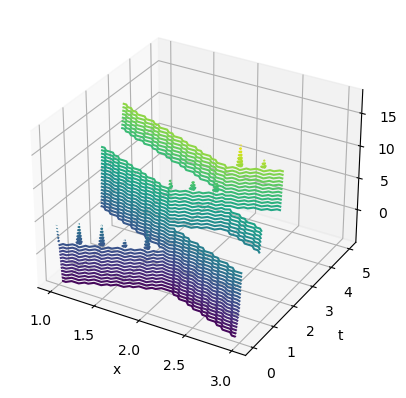

In [121]:
fig = plt.figure()

ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('z')

In [132]:
real_y = lambda x_val, t_val: y_expr.subs({x: x_val, t: t_val}).evalf()
real_y = np.vectorize(real_y)

In [133]:
X, Y = np.meshgrid(x_data, t_data)
Z = real_y(X, Y)

In [135]:
Z= np.matrix(Z, dtype=float)

Text(0.5, 0, 'z')

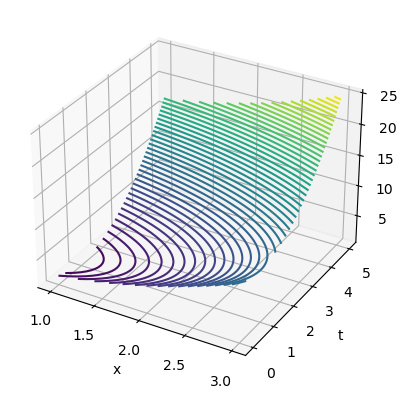

In [136]:
fig = plt.figure()

ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('z')